In [1]:
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import numpy as np
from matplotlib.lines import Line2D


In [7]:
plt.style.use("default")
plt.rcParams.update({'font.size': 22})

palette = ["#e072b5",
"#69b15f",
"#737df6",
"#c79737",
"#b67ae4",
"#e57368",
"#799ddb"]

In [3]:
def find_best_fit_scatter(start, stop, ax):
    #Read in pickled files - from Cronin relative file path
    full_id_degrees = pickle.load(file=open("../Data/Attachment_noNetworks/cpd_degrees_" + str(start) + "_" + str(stop) + ".p", "rb"))
    pref_attach_dict = pickle.load(file=open("../Data/Attachment_noNetworks/pref_attach_" + str(start) + "_" + str(stop) + ".p", "rb"))
    
    #Read in pickled files - from cronin file path
    # full_id_degrees = pickle.load(file=open("Z:/group/John Malloy/Projects/Patents/Data/full_id_degrees_1980_1989.p", "rb"))
    # pref_attach_dict = pickle.load(file=open("Z:/group/John Malloy/Projects/Patents/Data/pref_attach_dict_1980_1989.p", "rb"))

    #Create two list of initial degrees
    initial_degrees = []
    for key, value in full_id_degrees.items():
        initial_degrees.append(value[0])

    #Fit line of best fit
    m,b = np.polyfit(initial_degrees, list(pref_attach_dict.values()), 1)
    ax.plot(np.arange(0,max(initial_degrees),1), m*np.arange(0,max(initial_degrees),1) + b,
        label= "Slope=" + str(round(m,3)),
        color=palette[0], linewidth=3)

    #Plot all cpd points
    ax.scatter(initial_degrees, pref_attach_dict.values(), color=palette[0], alpha=0.2)
    
    #Linear fit - comment out for full analysis
    x = np.arange(0,max(initial_degrees),1)
    ax.plot(x, x, "--", alpha=0.5, color="k", linewidth=3)

    ax.legend(prop={"size":14}, loc="upper left") #Puts slope in axes (failing on last subplot for some reason)
    ax.title.set_text(str(start) + " - " + str(stop)) #Sets title instead

    # if start == 2015:
    #     patch = mpatches.Patch(color=colors[str(start)], label="slope=" + str(round(m,3)), linewidth=3)
    #     ax.legend(handles=[patch])
    
    del (full_id_degrees)
    del (pref_attach_dict)
    del (initial_degrees)

    #Return the slope for the outer legend
    return str(round(m,3))

Text(0.5, 0, 'Initial Degree')

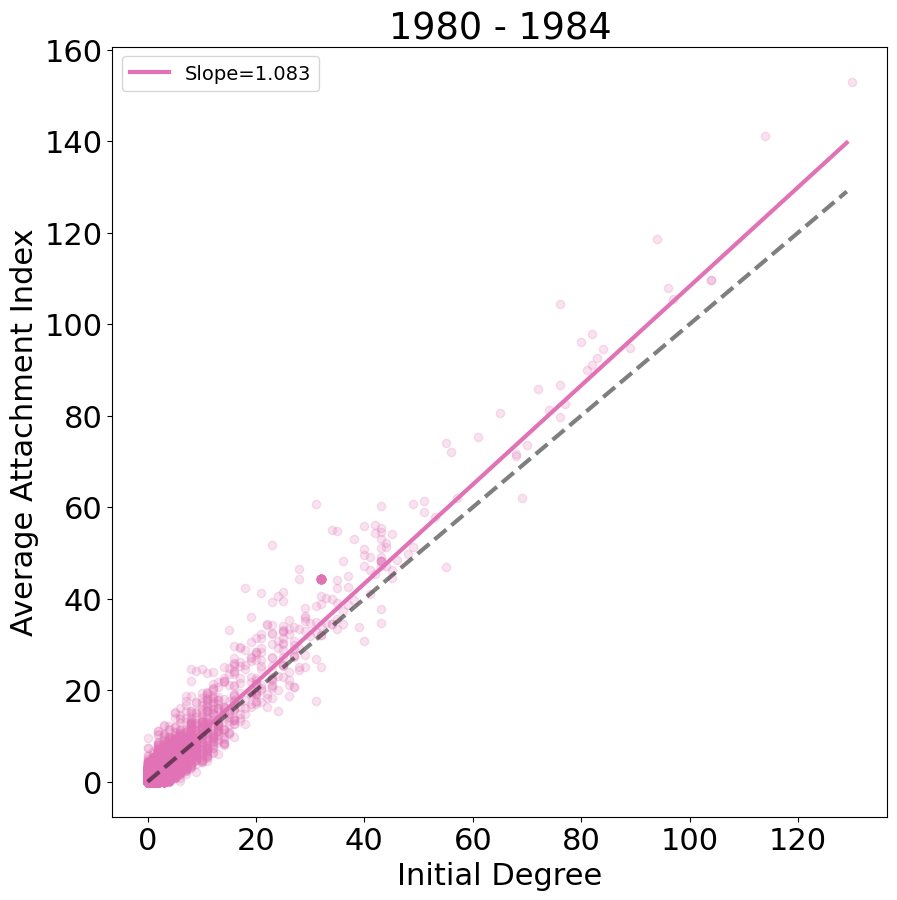

In [8]:
### Single plot (1980-1984)

fig, ax = plt.subplots(figsize=(10,10))

slopes = []

slopes.append(find_best_fit_scatter(1980, 1984, ax))

ax.set_ylabel("Average Attachment Index")
ax.set_xlabel("Initial Degree")

100%|██████████| 8/8 [13:46<00:00, 103.33s/it]


Text(0.07, 0.5, 'Average Attachment Index')

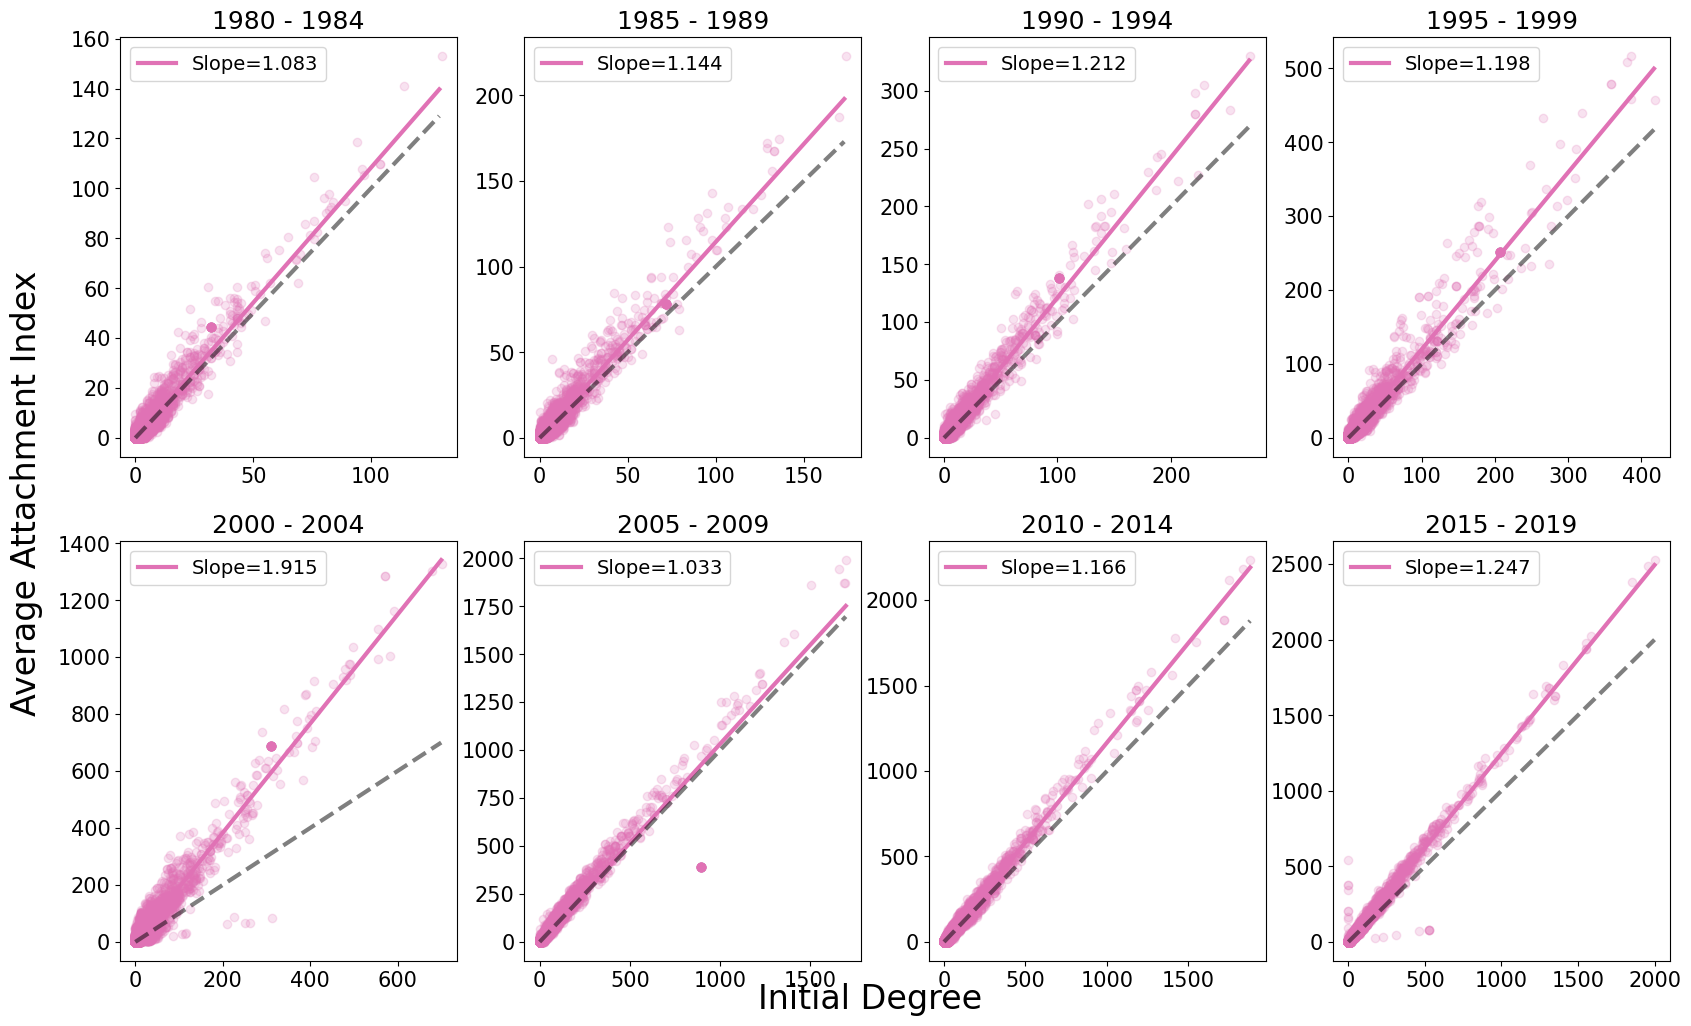

In [6]:
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(20,12))
axes = [fig.add_subplot(241), fig.add_subplot(242), fig.add_subplot(243),
    fig.add_subplot(244), fig.add_subplot(245), fig.add_subplot(246),
    fig.add_subplot(247), fig.add_subplot(248)]

pairs = [(1980, 1984), (1985, 1989), (1990, 1994), (1995, 1999), (2000, 2004), (2005, 2009), (2010,2014), (2015, 2019)]
test_pairs = [(1980, 1984), (1985, 1989)] #, (1980, 1984), (1985, 1989), (1980, 1984), (1985, 1989), (1980, 1984), (1985, 1989)]
slopes = []

for i in tqdm(range(len(pairs))):
    slopes.append(find_best_fit_scatter(pairs[i][0], pairs[i][1], axes[i]))

lines = [Line2D([0], [0], color='k', alpha=0.5, lw=4, linestyle="dashed"),
                Line2D([0], [0], lw=4),
                Line2D([0], [0], lw=4),
                Line2D([0], [0], lw=4),
                Line2D([0], [0], lw=4),
                Line2D([0], [0], lw=4),
                Line2D([0], [0], lw=4),
                Line2D([0], [0], lw=4),
                Line2D([0], [0], lw=4)
                ]


# Taken from https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib
# plt.subplots_adjust(left=0.125, bottom=0.9, right=0.1, top=0.9, wspace=0.2, hspace=0.2)


# plt.legend(lines, ["Linear"] + slopes, bbox_to_anchor=[1.7,2.24], prop={"size":20}, title="Best Fit Slope")
fig.text(0.5, 0.07, "Initial Degree", ha="center", size=24)
fig.text(0.07, 0.5, "Average Attachment Index", va="center", rotation="vertical", size=24)